# Imports and Definitions

In [67]:
import sys
sys.path.append('../')

In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from utils.data_utils import preprocess_and_normalize_energy_data
from sklearn.linear_model import LinearRegression
from utils.experiments_utils import split_data_set, fit_model, apply_data_transforms, test_model
%load_ext autoreload
%autoreload 2
SEED = 1223

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
param_cols = ['batch_size','input_size']

# ReLU
## Data Loading

In [70]:
data_unnormalized_relu = pd.read_csv('../data/relu-energies-parsed.csv')
data_relu = preprocess_and_normalize_energy_data(data_unnormalized_relu, param_cols, aggregate=True)
data_relu.head()

Final shape of data set: (500, 24)


,batch_size,input_size,Unnamed: 0,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cloud_provider,cloud_region,cpu_count,gpu_count,longitude,latitude,ram_total_size,rep_no,macs,forward_passes
0,173,4595816,1.0,30.228549,0.001246,0.041227,54.468809,30.313000,288.75,0.000023,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,7.950762e+08,32.666667
1,489,4427273,4.0,33.350714,0.001092,0.032729,75.289654,29.924333,288.75,0.000087,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,2.164936e+09,8.000000
2,306,1905843,7.0,30.532051,0.001000,0.032765,75.260527,30.226333,288.75,0.000019,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,5.831880e+08,44.333333
3,220,356031,10.0,30.064461,0.001233,0.041020,75.533914,30.244667,288.75,0.000001,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,7.832682e+07,627.666667
4,241,3519672,13.0,30.401052,0.001000,0.032880,76.921110,30.247667,288.75,0.000019,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,8.482410e+08,44.000000


## Modeling
### Feature Set: Parameters

In [71]:
dfs = split_data_set(data_relu, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Number of observations: train/350, val/100 and test-set/50
Average R2 Cross-Validation Score: 0.975 (± 0.011)
Average MSE Cross-Validation: -1.260e-03 (± 1.928e-04)
Validation R2 Score: 0.984
Validation MSE: 1.148e-03


Test R2 Score: 0.988
Test MSE: 8.248e-04


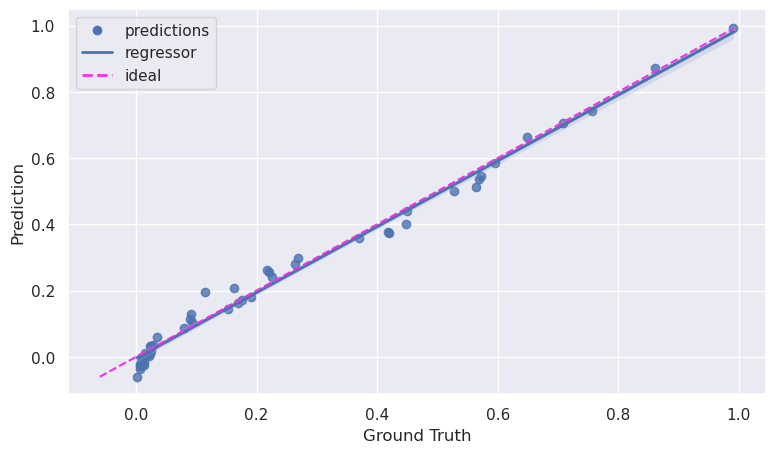

In [72]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)

## Modeling
### Feature Set: MACs

In [73]:
dfs = split_data_set(data_relu, ['macs'], SEED)
transformers_dict = {
    "x_preprocessors": None,
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Number of observations: train/350, val/100 and test-set/50
Average R2 Cross-Validation Score: 0.974 (± 0.012)
Average MSE Cross-Validation: -1.352e-03 (± 2.484e-04)
Validation R2 Score: 0.985
Validation MSE: 1.128e-03


Test R2 Score: 0.988
Test MSE: 8.129e-04


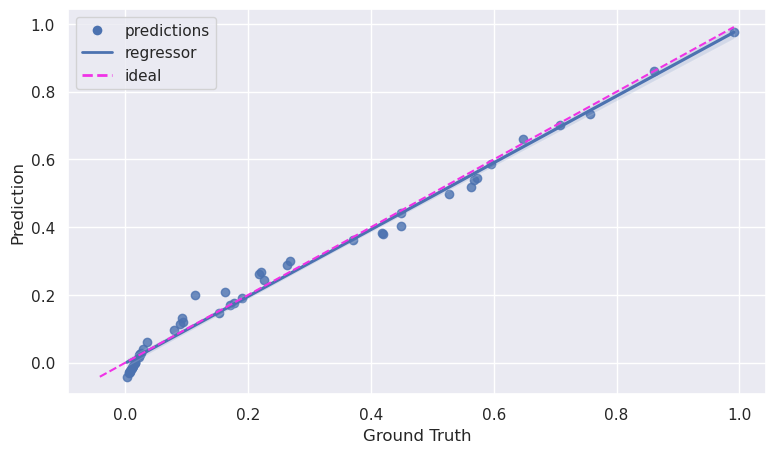

In [74]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)

# TanH
## Data Loading

In [75]:
data_unnormalized_tanh = pd.read_csv('../data/tanh-energies-parsed.csv')
data_tanh = preprocess_and_normalize_energy_data(data_unnormalized_tanh, param_cols, aggregate=True)
data_tanh.head()

Final shape of data set: (500, 24)


,batch_size,input_size,Unnamed: 0,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cloud_provider,cloud_region,cpu_count,gpu_count,longitude,latitude,ram_total_size,rep_no,macs,forward_passes
0,353,1326998,1.0,30.550957,0.001123,0.036837,76.592422,29.856333,288.75,0.000017,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,52.333333
1,341,4892172,4.0,32.817825,0.001073,0.032708,75.291991,29.623333,288.75,0.000076,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,9.000000
2,111,4566314,7.0,30.134626,0.001112,0.036898,76.599624,29.869333,288.75,0.000019,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,46.333333
3,441,1087035,10.0,30.380539,0.001120,0.036885,75.816491,29.481333,288.75,0.000012,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,71.666667
4,156,690781,13.0,30.064531,0.001355,0.045069,77.737987,29.561333,288.75,0.000002,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,440.000000


## Modeling
### Feature Set: Parameters

In [76]:
dfs = split_data_set(data_tanh, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=False)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Number of observations: train/350, val/100 and test-set/50
Average R2 Cross-Validation Score: 0.976 (± 0.005)
Average MSE Cross-Validation: -1.310e-03 (± 1.801e-04)
Validation R2 Score: 0.973
Validation MSE: 1.702e-03


Test R2 Score: 0.987
Test MSE: 8.536e-04


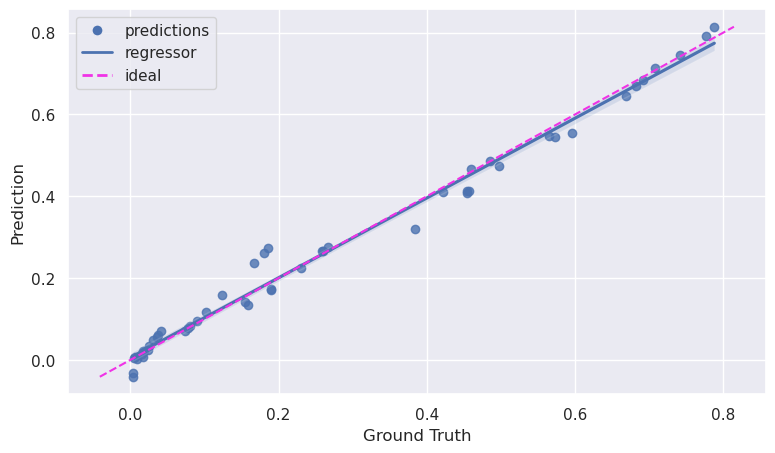

In [77]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)

# Sigmoid
## Data Loading

In [78]:
data_unnormalized_sigmoid = pd.read_csv('../data/sigmoid-energies-parsed.csv')
data_sigmoid = preprocess_and_normalize_energy_data(data_unnormalized_sigmoid, param_cols, aggregate=True)
data_sigmoid.head()

Final shape of data set: (500, 24)


,batch_size,input_size,Unnamed: 0,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cloud_provider,cloud_region,cpu_count,gpu_count,longitude,latitude,ram_total_size,rep_no,macs,forward_passes
0,506,4505379,1.0,35.223038,0.001152,0.032715,75.323322,29.871333,288.75,0.000123,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,6.000000
1,219,1266149,4.0,30.255887,0.001000,0.033037,78.446300,29.714000,288.75,0.000006,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,117.333333
2,352,3366962,7.0,30.672796,0.001125,0.036669,73.302046,29.602667,288.75,0.000064,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,10.000000
3,435,624213,10.0,30.178774,0.001238,0.041040,75.634361,29.724667,288.75,0.000005,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,122.000000
4,494,2160900,13.0,31.276623,0.001023,0.032715,74.445486,29.840000,288.75,0.000058,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,11.333333


## Modeling
### Feature Set: Parameters

In [79]:
dfs = split_data_set(data_sigmoid, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Number of observations: train/350, val/100 and test-set/50
Average R2 Cross-Validation Score: 0.981 (± 0.005)
Average MSE Cross-Validation: -1.183e-03 (± 1.935e-04)
Validation R2 Score: 0.980
Validation MSE: 1.048e-03


Test R2 Score: 0.984
Test MSE: 8.267e-04


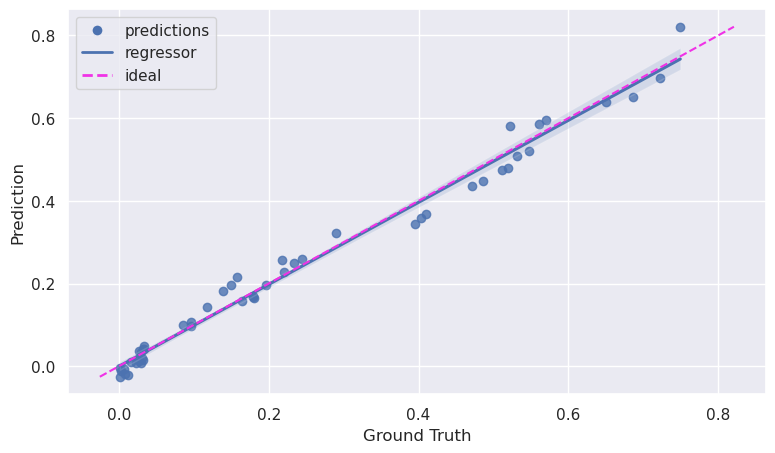

In [80]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)

# Softmax
## Data Loading

In [81]:
data_unnormalized_softmax = pd.read_csv('../data/softmax-energies-parsed.csv')
data_softmax = preprocess_and_normalize_energy_data(data_unnormalized_softmax, param_cols, aggregate=True)
data_softmax.head()

Final shape of data set: (500, 24)


,batch_size,input_size,Unnamed: 0,duration,emissions,emissions_rate,cpu_power,gpu_power,ram_power,cpu_energy,...,cloud_provider,cloud_region,cpu_count,gpu_count,longitude,latitude,ram_total_size,rep_no,macs,forward_passes
0,415,1673479,1.0,30.401512,0.001120,0.036864,74.622881,29.727333,288.75,0.000042,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,16.666667
1,150,528017,4.0,30.119854,0.001237,0.041087,75.758087,29.712333,288.75,0.000003,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,230.000000
2,352,3105482,7.0,32.593072,0.001069,0.032813,76.397953,29.986667,288.75,0.000077,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,9.000000
3,50,3883956,10.0,30.218480,0.001117,0.036972,78.031386,29.637333,288.75,0.000008,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,85.666667
4,91,2167276,13.0,30.187220,0.001237,0.040999,77.379755,29.831333,288.75,0.000008,...,NaN,NaN,2.0,1.0,9.491,51.2993,770.0,2.0,0.0,85.000000


## Modeling
### Feature Set: Parameters

In [82]:
dfs = split_data_set(data_softmax, param_cols, SEED)
transformers_dict = {
    "x_preprocessors": [PolynomialFeatures(degree=2, interaction_only=True)],
    "y_preprocessor": MinMaxScaler()
}
dfs, _ = apply_data_transforms(dfs, transformers_dict)
model, *_ = fit_model(LinearRegression(), dfs["x_train"], dfs["y_train"], dfs["x_val"], dfs["y_val"], plot_results=False)

Number of observations: train/350, val/100 and test-set/50
Average R2 Cross-Validation Score: 0.991 (± 0.002)
Average MSE Cross-Validation: -5.667e-04 (± 9.130e-05)
Validation R2 Score: 0.991
Validation MSE: 4.623e-04


Test R2 Score: 0.991
Test MSE: 5.492e-04


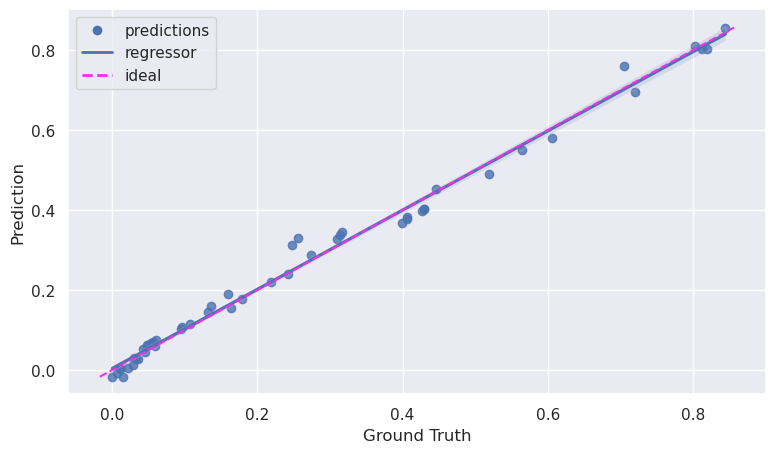

In [83]:
_, *_ = test_model(model,dfs["x_test"],dfs["y_test"],plot_results=True)